# Netflix Data Analysis Project






# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

In [7]:
 #the dataset of netflix
df=pd.read_csv('netflix1.csv')

In [5]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in\r
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries\r
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries\r"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies\r"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movi..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
    8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


:

Format Date is Adjusting

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [9]:
df.size

87900

Checking for Null Values

In [10]:
df.isnull().value_counts()

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
Name: count, dtype: int64

In [11]:
df = df.drop_duplicates()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Exploratory Data Analysis
Top Ratings in  Netfix 

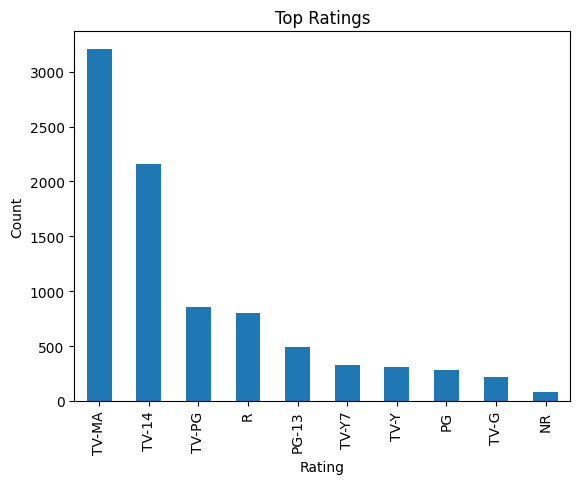

In [24]:
df['rating'] = df['rating'].astype(str)
df['Years']=df['release_year']
year= df['rating'].value_counts()
year[:10].plot(kind='bar')
plt.title("Top Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top 10 Listed in Genre types

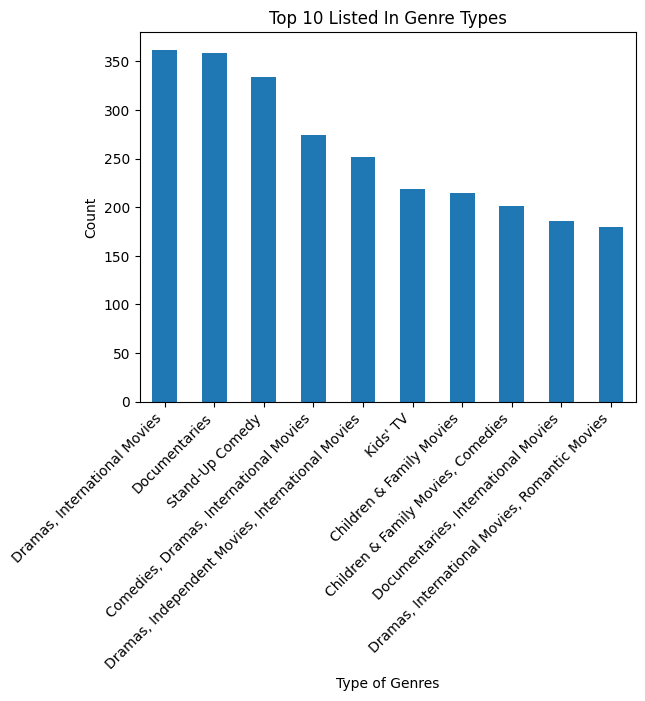

In [14]:
top_10_types = df['listed_in'].value_counts()
top_10_types[:10].plot(kind="bar")
plt.title('Top 10 Listed In Genre Types')
plt.xlabel("Type of Genres")
plt.xticks(rotation=45,ha='right')
plt.ylabel('Count')
plt.show()

# Top 7 Genres Distribution

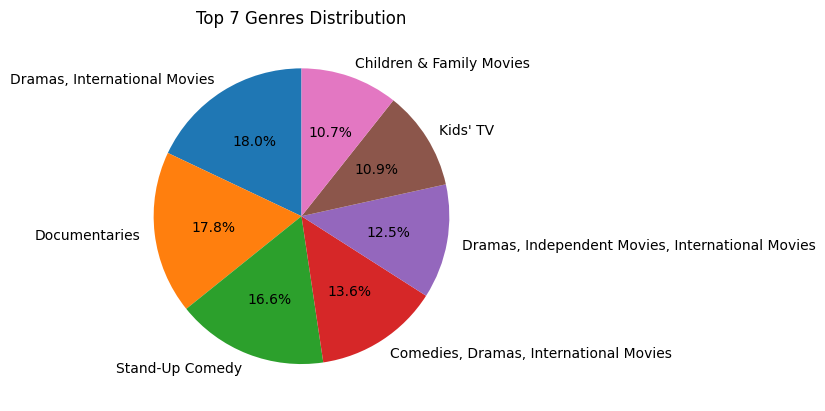

In [15]:
genre_list = df['listed_in'].value_counts()
genre_list[:7].plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Top 7 Genres Distribution')
plt.ylabel('')
plt.show()

# Genre Distribution

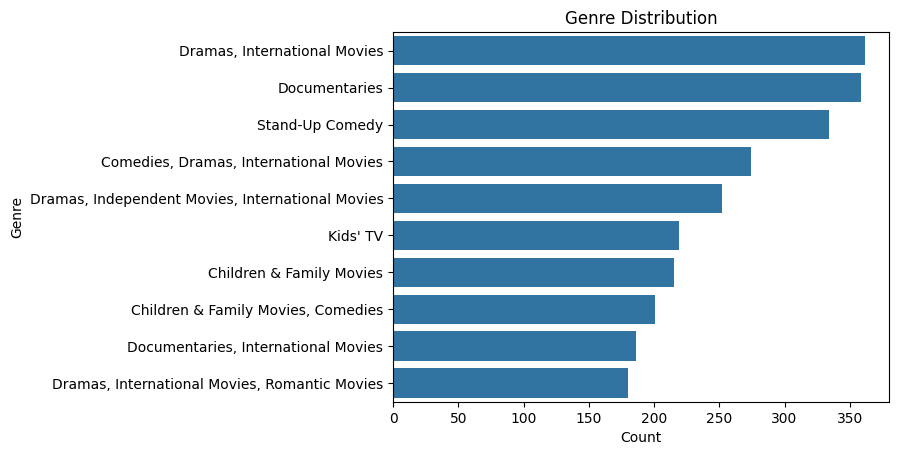

In [16]:
sns.countplot(y='listed_in', data=df, order=df['listed_in'].value_counts().index[:10])
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Tree Map of Genre Distribution

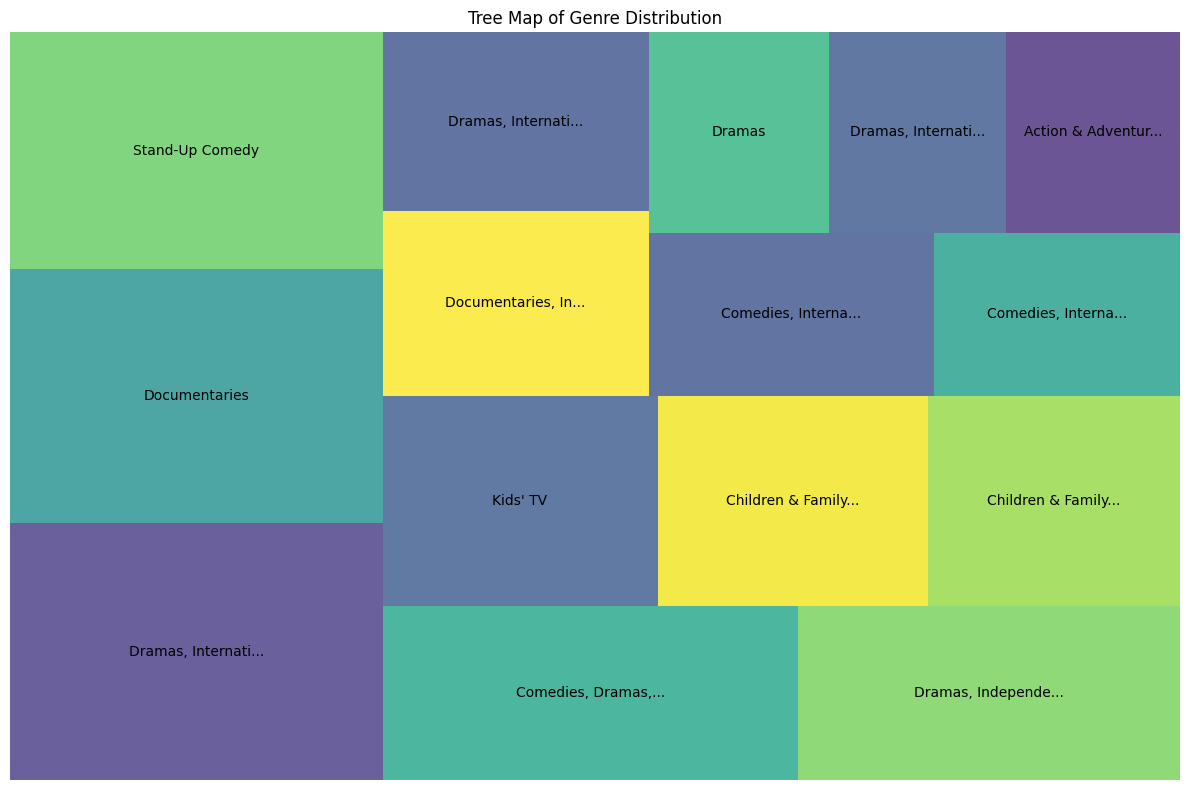

In [17]:
import squarify
import matplotlib.pyplot as plt

# Truncate genre labels if too long
genre_counts = df['listed_in'].value_counts().head(15)
labels = [label if len(label) < 20 else label[:17] + "..." for label in genre_counts.index]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=genre_counts.values, label=labels, alpha=0.8, text_kwargs={'fontsize':10})
plt.title('Tree Map of Genre Distribution')
plt.axis('off')
plt.tight_layout()
plt.show()


# Distribution of Content by Type

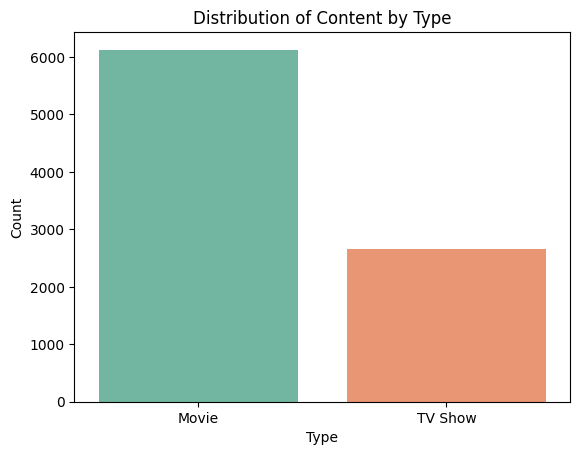

In [19]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Distribution of Content by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Most Common Genres on Netfix

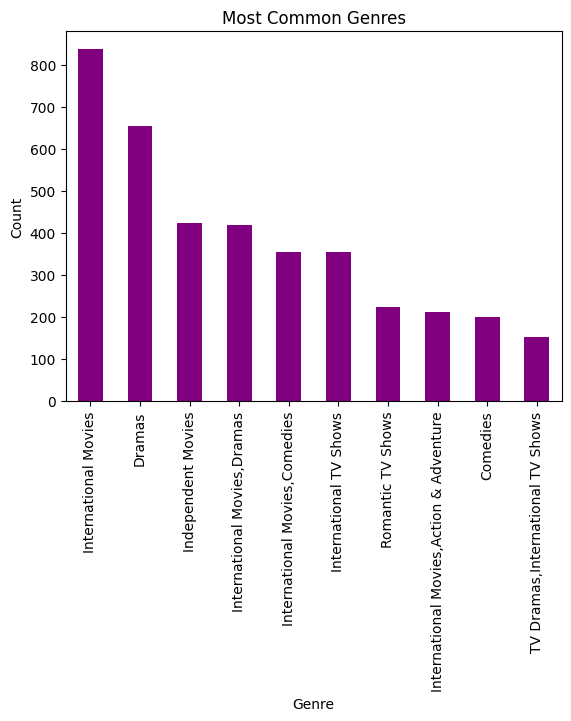

In [20]:
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(', ')
genre_counts = Counter(genres)
common_genres = pd.Series(genre_counts).nlargest(10)
common_genres.plot(kind='bar', color='purple')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Content Added Over Time

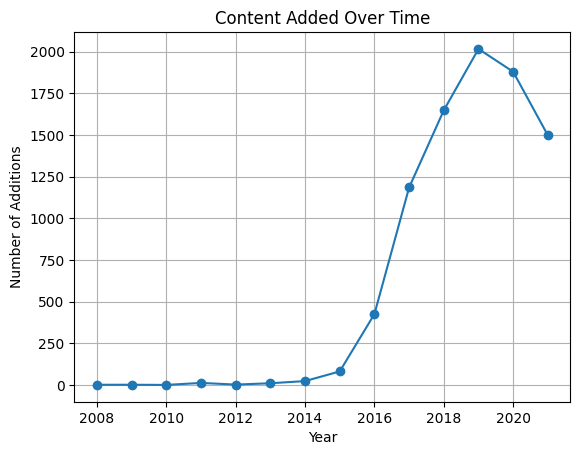

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()

# Top 10 Directories with Most Titles

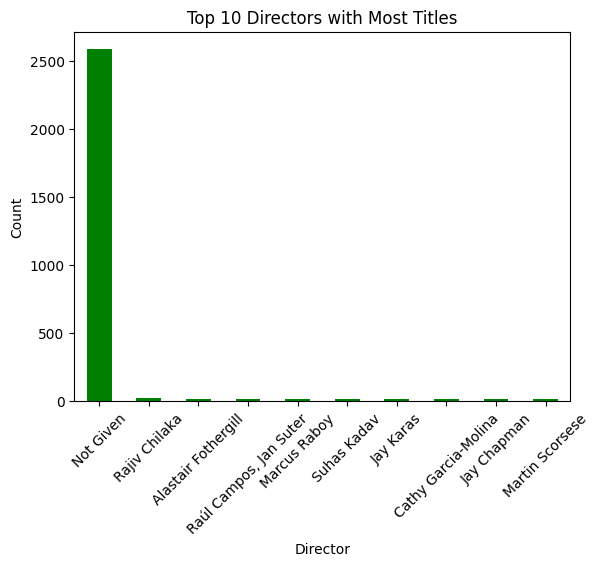

In [22]:
top_directors = df['director'].value_counts().drop('', errors='ignore').head(10)
top_directors.plot(kind='bar', color='green')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Cloud of Movies Titles

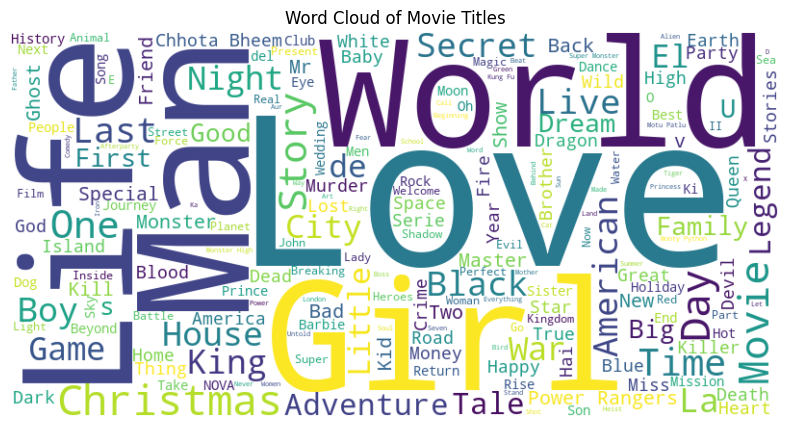

In [23]:
from wordcloud import WordCloud

titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()